You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

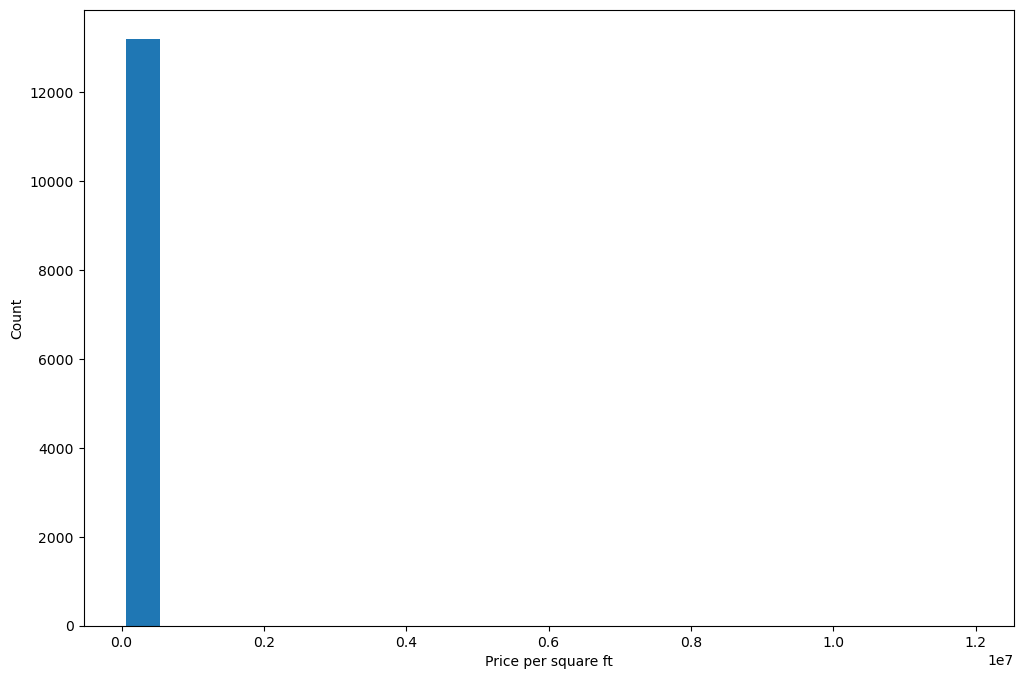

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

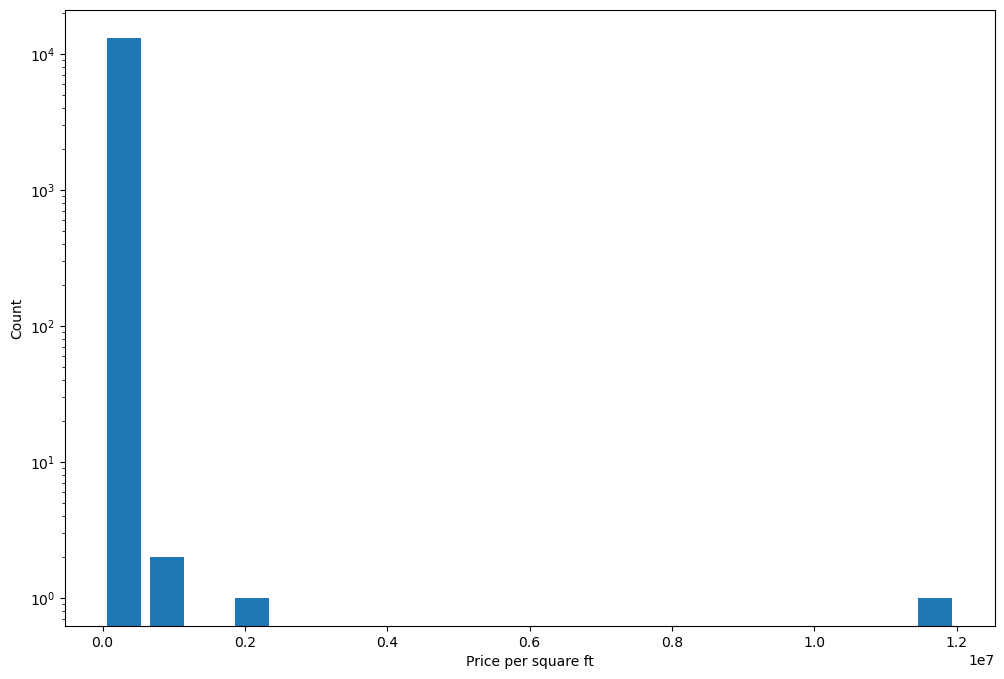

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

(1) Treat outliers using percentile first

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
outlier = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outlier.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000


In [10]:
outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [11]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [12]:
df.shape

(13200, 7)

In [15]:
df.shape[0] - df2.shape[0]

28

(2) Now remove outliers using 4 standard deviation

In [17]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit,min_limit

(23227.73653589429, -9900.429065502549)

In [18]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)]
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6641,other,3 BHK,1600.0,3.0,95.00,3,5937
3566,Rajiv Nagar,4 BHK,2340.0,4.0,148.00,4,6324
1720,Kammasandra,3 BHK,912.0,2.0,39.00,3,4276
2706,Malleshwaram,2 BHK,1124.0,3.0,80.00,2,7117
11486,Varthur,3 BHK,2145.0,3.0,170.00,3,7925
6089,other,8 BHK,800.0,6.0,110.00,8,13750
9851,Chikkabanavar,4 Bedroom,1200.0,4.0,130.00,4,10833
9200,other,3 BHK,1325.0,2.0,47.00,3,3547
6948,Whitefield,4 Bedroom,1800.0,4.0,178.00,4,9888
5437,Raja Rajeshwari Nagar,2 BHK,1140.0,2.0,49.27,2,4321


In [19]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [20]:
df2.shape

(13172, 7)

In [22]:
df2.shape[0] - df3.shape[0]

125